In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
df = pd.read_csv('loan.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
print(df.shape)
df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
obj_cols = []
for col in df.columns:
    if(str(df[col].dtype)=='object'):
        obj_cols.append(col)

In [26]:
cat_cols = []
other_col=[]
for col in obj_cols:
    le = df[col].value_counts().size
    if le <= 7:
        cat_cols.append(col)
    else:
        other_col.append(col)
    #print(col+"\t\t\t\t"+str(df[col].value_counts().size) )

['term', 'grade', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'initial_list_status', 'next_pymnt_d', 'application_type']
['int_rate', 'sub_grade', 'emp_title', 'emp_length', 'issue_d', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']


<Axes: xlabel='loan_status', ylabel='out_prncp_inv'>

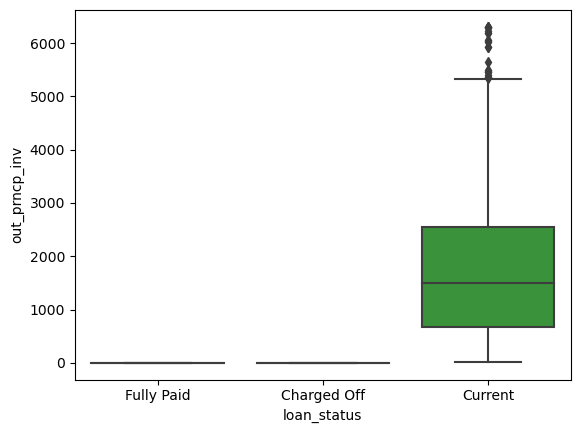

In [112]:
print(cat_cols)
print(other_col)
df['loan_status'].value_counts()
sns.boxplot(data=df, x='loan_status', y='out_prncp_inv')

<Axes: xlabel='loan_status', ylabel='out_prncp'>

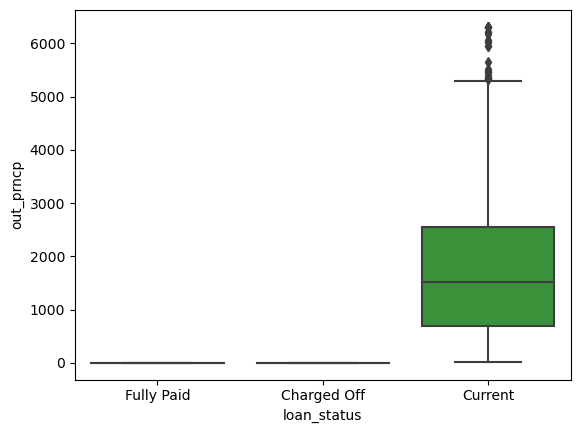

In [113]:
sns.boxplot(data=df, x='loan_status', y='out_prncp')

In [115]:
print(df['loan_status'].value_counts())

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64
1)id - 39717
2)member_id - 39717
3)loan_amnt - 885
4)funded_amnt - 1041
5)funded_amnt_inv - 8205
6)installment - 15383
7)annual_inc - 5318


TypeError: Neither the `x` nor `y` variable appears to be numeric.

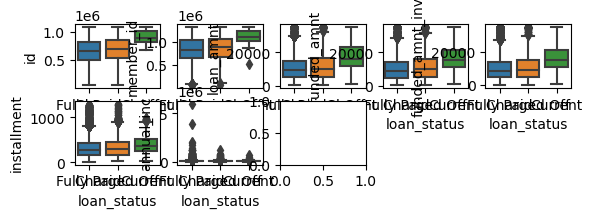

In [114]:

cnt = 1
for col in df_num.columns:
    plt.subplot(5,5,cnt)
    sns.boxplot(data=df,x='loan_status', y=col)
    print(str(cnt)+")"+col +" - "+str(df[col].value_counts().size) )
    cnt+=1
    if(cnt == 26):
        break

In [72]:
#help(sns.boxplot())

In [51]:

df_num.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,162.87,24000.0,27.65,0,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,59.83,30000.0,1.00,0,5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,84.33,12252.0,8.72,0,2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,339.31,49200.0,20.00,0,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,67.79,80000.0,17.94,0,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [102]:
df['loan_status'].value_counts().to_dict()
cnt = 1
ndict = {}
for t in df['loan_status'].value_counts().to_dict():
    ndict[t]=cnt
    cnt+=1
ndict
df['loan_status'] = df['loan_status'].map(ndict)

<Axes: >

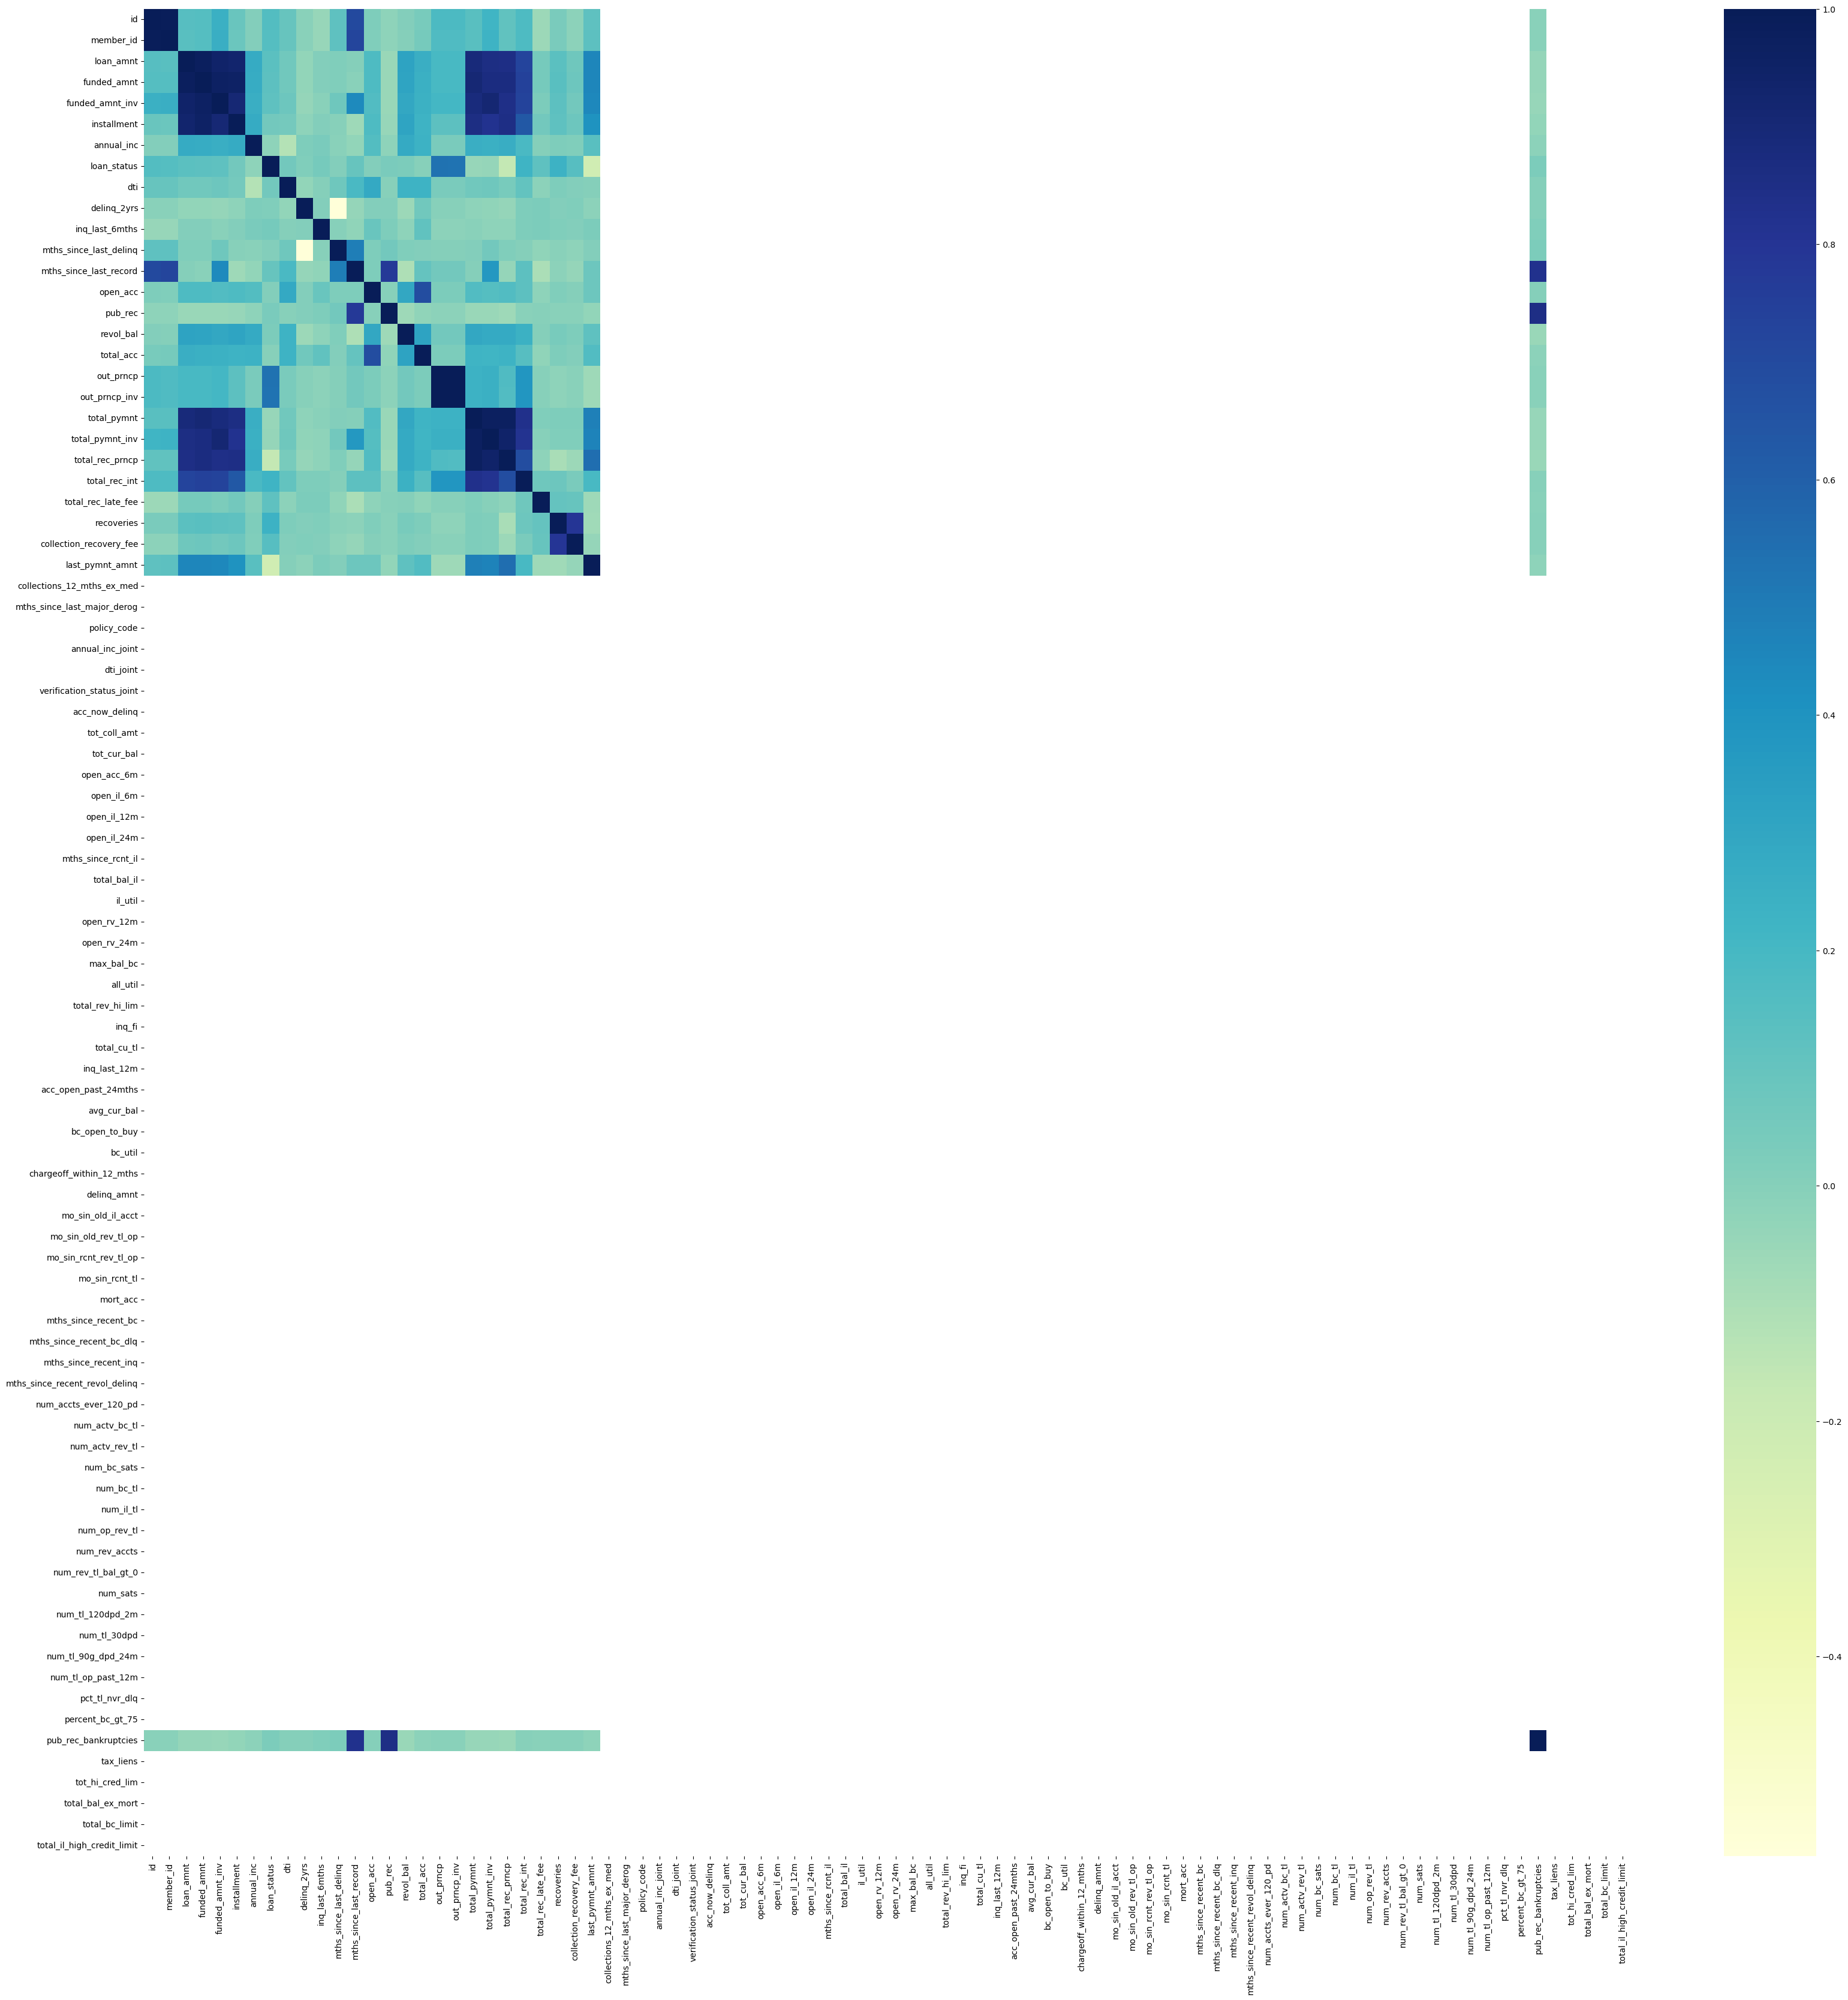

In [103]:
obj_cols.remove('loan_status') 
plt.subplots(figsize=(40,40))  
df_num = df.drop(obj_cols, axis=1)
sns.heatmap(df_num.corr(), cmap='YlGnBu')

In [108]:
#out_prncp, out_prncp_inv
df['out_prncp_inv']

0          0.00
1          0.00
2          0.00
3          0.00
4        524.06
          ...  
39712      0.00
39713      0.00
39714      0.00
39715      0.00
39716      0.00
Name: out_prncp_inv, Length: 39717, dtype: float64